In [1]:
#The Dataset is gold price prediction`

In [2]:
import pandas as pd
import numpy as np

#importing the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
#models 
#Processing step
from sklearn.model_selection import KFold

#Models selections
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost
#Cross validation
from sklearn.model_selection import cross_val_score
#Validatiion
from sklearn.metrics import *

In [4]:
gold_df = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\FINAL_USO.csv')
gold_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
#Seeing the shape of the data
gold_df.shape

(1718, 81)

In [6]:
#Checking the data has null
gold_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [7]:
gold_df['Date'].apply(lambda x: x.split('-')[2])

0       15
1       16
2       19
3       20
4       21
        ..
1713    24
1714    26
1715    27
1716    28
1717    31
Name: Date, Length: 1718, dtype: object

In [8]:
#Lets see the data types of the gold_df dataframe
gold_df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 81, dtype: object

#Data attribute is a object so lets split the date attribute into seperate attributes as int
gold_df['Date'].apply(lambda x: x.split('-')[0]) #Index 0 is giving us the year
gold_df['Date'].apply(lambda x:x.split('-')[1]) #Gives us month
gold_df['Date'].apply(lambda x:x.split('-'[2])) #Gives us the date 

In [9]:
#Lets create the attributes
gold_df['Year'] = gold_df['Date'].apply(lambda x: x.split('-')[0]) #Index 0 is giving us the year
gold_df['Month'] = gold_df['Date'].apply(lambda x:x.split('-')[1]) #Gives us month
gold_df['Day'] = gold_df['Date'].apply(lambda x:x.split('-')[2]) #Gives us the date 

In [10]:
gold_df.shape

(1718, 84)

In [11]:
#Dropping the date attribute since it's not required as of now :))

gold_df.drop('Date', axis=1, inplace=True)
gold_df.head(2)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16


In [12]:
gold_df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
                  ...   
USO_Adj Close    float64
USO_Volume         int64
Year              object
Month             object
Day               object
Length: 83, dtype: object

In [13]:
gold_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In [14]:
#To find the column is null or not
gold_df['Open'].isnull().count()

1718

In [15]:
#Since columns or attributes are very huge no need to take risk lets write a function to check weather col is null or not
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume',
       'Year', 'Month', 'Day']

def null_in_column(columns):
    check = 0
    for col in columns:
        check = gold_df[col].isnull().count()
        if check < 1718:
            print(col)
            return(col)
        else:
            print(f'No null data in: {col}')

In [16]:
null_in_column(columns)
#Luckly no attribute is null offf

No null data in: Open
No null data in: High
No null data in: Low
No null data in: Close
No null data in: Adj Close
No null data in: Volume
No null data in: SP_open
No null data in: SP_high
No null data in: SP_low
No null data in: SP_close
No null data in: SP_Ajclose
No null data in: SP_volume
No null data in: DJ_open
No null data in: DJ_high
No null data in: DJ_low
No null data in: DJ_close
No null data in: DJ_Ajclose
No null data in: DJ_volume
No null data in: EG_open
No null data in: EG_high
No null data in: EG_low
No null data in: EG_close
No null data in: EG_Ajclose
No null data in: EG_volume
No null data in: EU_Price
No null data in: EU_open
No null data in: EU_high
No null data in: EU_low
No null data in: EU_Trend
No null data in: OF_Price
No null data in: OF_Open
No null data in: OF_High
No null data in: OF_Low
No null data in: OF_Volume
No null data in: OF_Trend
No null data in: OS_Price
No null data in: OS_Open
No null data in: OS_High
No null data in: OS_Low
No null data in: 

In [17]:
#Converting the object to integer since I forgot at the beginning
gold_df['Year'] = gold_df['Year'].astype(int)
gold_df['Month'] = gold_df['Month'].astype(int)
gold_df['Day'] = gold_df['Day'].astype(int)

In [18]:
gold_df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07,2015.010477,6.548312,15.655995
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07,2.017658,3.425341,8.700066
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06,2011.000000,1.000000,1.000000
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06,2013.000000,4.000000,8.000000
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07,2015.000000,7.000000,16.000000
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07,2017.000000,10.000000,23.000000
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08,2018.000000,12.000000,31.000000


In [19]:
#Lets see the correlation of the data in heat-map
gold_corr = gold_df.corr()

<AxesSubplot:>

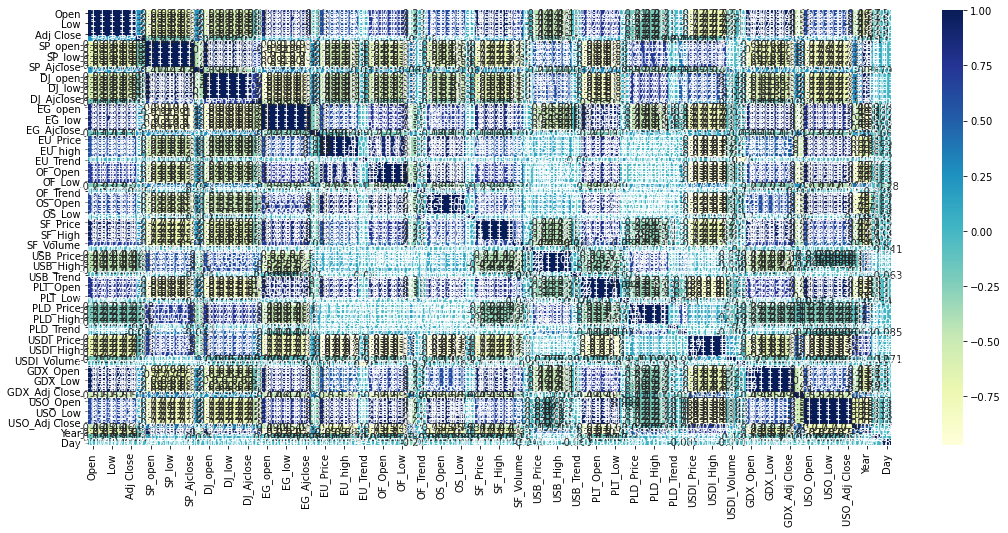

In [20]:
#Lets plot the heat-map to understand the correlation
plt.figure(figsize=(18,8))
sns.heatmap(gold_corr, annot=True, cmap='YlGnBu')

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='USB_Price', ylabel='Density'>

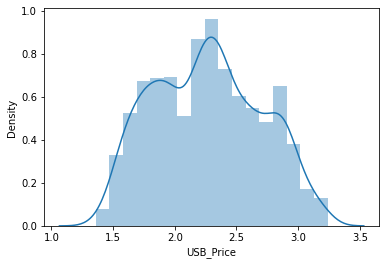

In [21]:
#Lets see the density plot of the Usb price

sns.distplot(gold_df['USB_Price'])

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDX_Close', ylabel='Density'>

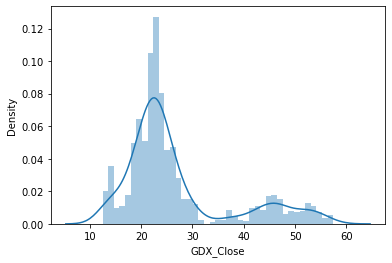

In [22]:
sns.distplot(gold_df['GDX_Close'])
#Data is quit skewed to right

<AxesSubplot:xlabel='Year', ylabel='GDX_Close'>

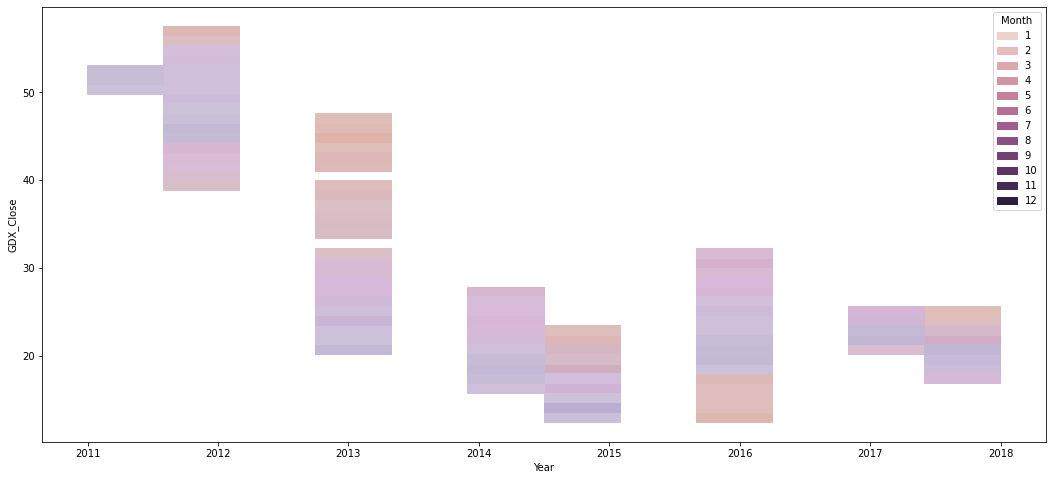

In [23]:
#Lets plot the histogram

plt.figure(figsize=(18,8))
sns.histplot(x='Year', y='GDX_Close',data=gold_df, hue='Month')

In [24]:
#Splitting the data since priority is gold close price
x = gold_df.drop('GDX_Close', axis=1)
y = gold_df['GDX_Close']

In [25]:
#Lets do train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=30, test_size=0.2)
print(f'x_Train data shape:{x_train.shape}')
print(f'x_test data shape:{x_test.shape}')

print(f'y_Train data shape:{y_train.shape}')
print(f'y_Test data shape:{y_test.shape}')

#r2_score()
#mean_squared_error()
#mean_absolute_error()
#rmse()

x_Train data shape:(1374, 82)
x_test data shape:(344, 82)
y_Train data shape:(1374,)
y_Test data shape:(344,)


In [26]:
#Lets use the kfold validation
kf = KFold(n_splits=15)

In [27]:
#Now lets create af funcation and check which model works better

models = [LinearRegression(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         SVR(),
         KNeighborsRegressor(),
         GradientBoostingRegressor(),
         xgboost.XGBRegressor()]

In [28]:
def select_model(models,x=x, y=y):
    for m in range(len(models)):
        cross_val_scoring = cross_val_score(estimator=models[m], X=x, y=y,cv=kf, n_jobs=-1 )
        models[m].fit(x_train,y_train)
        predicting_test = models[m].predict(x_test)
        print(f'r2_score of model {models[m]} is: {r2_score(predicting_test,y_test)}')
        print(f'Mean absolute error of {models[m]} is:{mean_absolute_error(predicting_test,y_test)}')
        print(f'mean squared error of {models[m]} is :{mean_squared_error(predicting_test,y_test)}')
        print(f'rmse of {models[m]} is :{np.sqrt(mean_squared_error(predicting_test,y_test))}')
        print(f'The model {models[m]} mean accuracy is :{np.mean(cross_val_scoring)}')
        print('*'*30)

In [29]:
select_model(models)

r2_score of model LinearRegression() is: 0.9999767763949633
Mean absolute error of LinearRegression() is:0.037214672754243616
mean squared error of LinearRegression() is :0.002513771313296121
rmse of LinearRegression() is :0.050137524004443226
The model LinearRegression() mean accuracy is :0.9959734531447364
******************************
r2_score of model DecisionTreeRegressor() is: 0.9993801738278081
Mean absolute error of DecisionTreeRegressor() is:0.16953489534883717
mean squared error of DecisionTreeRegressor() is :0.06694886883862784
rmse of DecisionTreeRegressor() is :0.2587447948048962
The model DecisionTreeRegressor() mean accuracy is :0.9489278874217871
******************************
r2_score of model RandomForestRegressor() is: 0.999764491716785
Mean absolute error of RandomForestRegressor() is:0.11164895581395286
mean squared error of RandomForestRegressor() is :0.02545576697162668
rmse of RandomForestRegressor() is :0.15954863512931308
The model RandomForestRegressor() mea

In [30]:
#Seriously LinearRegression(), RandomForestRegressor() and XGBRegressor() works best for this scenerio

In [31]:
#XGB already hyper parameter is tuned for the bset accuracy that cool

In [32]:
# Now if we want to tune the hyper parameter for the LinearRegression() and RandomForesetRegressor()
#Lets import randomized searchcv() and grid search cv()

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

LinearRegression( fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
    positive=False,)
    fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator with ``normalize=False``.

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup for n_targets > 1 and sufficient large problems.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

positive : bool, default=False
    When set to ``True``, forces the coefficients to be positive. This
    option is only supported for dense arrays.

--------
Ridge : Ridge regression addresses some of the
    problems of Ordinary Least Squares by imposing a penalty on the
    size of the coefficients with l2 regularization.
Lasso : The Lasso is a linear model that estimates
    sparse coefficients with l1 regularization.
ElasticNet : Elastic-Net is a linear regression
    model trained with both l1 and l2 -norm regularization of the
    coefficients.

-----------------------------------------
Looks like there is not much we can do in linearRegression



RandomForestRegressor()
n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,

In [33]:
radom_search = {'n_estimators':[int(x) for x in np.linspace(200,2000,10)],
               'criterion':['mse','mae'],
               'max_depth':[int(x) for x in np.linspace(100,1000,10)],
               'min_samples_split':[2,4,6,8],
                'min_samples_leaf':[1,3,5,7],
                'max_features':['auto','sqrt','log2']
               }

In [ ]:
#Had to stop here since the dabba pc is occupying full CPU and literally taking more then 1 hour

In [ ]:
rfr = RandomForestRegressor()

random_model= RandomizedSearchCV(estimator=rfr,param_distributions=radom_search, n_iter=50,cv=10, verbose=2,n_jobs=-1)
random_model.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
random_model.best_params_

In [ ]:
random_model.best_estimator_

In [ ]:
#Lets do the grid search cv
grid_cv = {'n_estimators':[],
               'criterion':[],
               'max_depth':[],
               'min_samples_split':[],
                'min_samples_leaf':[],
                'max_features':[]
               }

grid_model = GridSearchCV()